#I- Affichage des données MNIST



1) Depuis votre Google Drive, créez un notebook, sur GoogleColab, nommé tp3_IA

2) Créez une section intitulée I- Affichage des données MNIST  

3)L'objectif de cette partie est de pouvoir afficher les instances de la base de données MNIST utilisée dans le TP2. Pour ce faire, vous allez tester deux méthodes : PCA et t-SNE. L'affichage de toutes les instances va être chronophage, par conséquent nous allons afficher que 10000 instances choisies aléatoirement. Pour réaliser ceci, utilisez le code suivant (avec mnist est la variable qui contient la base de données MNIST) :  

from sklearn.datasets import fetch_openml

import numpy as np


mnist = fetch_openml('mnist_784', version=1, as_frame=False)

mnist["target"] = mnist["target"].astype(np.uint8)


np.random.seed(42)

m = 10000

idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]

y = mnist['target'][idx]




In [1]:
# Importation des bibliothèques nécessaires
from sklearn.datasets import fetch_openml
import numpy as np

# Chargement des données MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist["target"] = mnist["target"].astype(np.uint8)

# Sélection aléatoire de 10000 instances
np.random.seed(42)
m = 10000
idx = np.random.permutation(60000)[:m]
X = mnist['data'][idx]
y = mnist['target'][idx]

##1- Utilisation de la méthode PCA

4) Créez un titre intitulé 1- Utilisation de la méthode PCA

5) Afin de réduire la dimensionnalité des données, appliquez la méthode PCA sur les données (X) en choisissant un nombre de composants de 2. Pensez à utiliser la fonction fit_transform (et non pas fit) de scikit-learn pour stocker les données réduites dans une variable nommée X_pca_reduced.

*texte en italique*

In [2]:
from sklearn.decomposition import PCA

# Application de la méthode PCA
pca=PCA(n_components=2)
X_pca_reduced=pca.fit_transform(X)

# Vérification de la nouvelle dimension des données
print("Nouvelle dimension des données réduites:", X_pca_reduced.shape)

Nouvelle dimension des données réduites: (10000, 2)


###6) Vérifiez si la nouvelle dimension des données réduites est bien 2.




7) Affichez les données réduites (les données après l'application de PCA) comme suit :
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))

plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y)

plt.axis('off')

plt.colorbar()



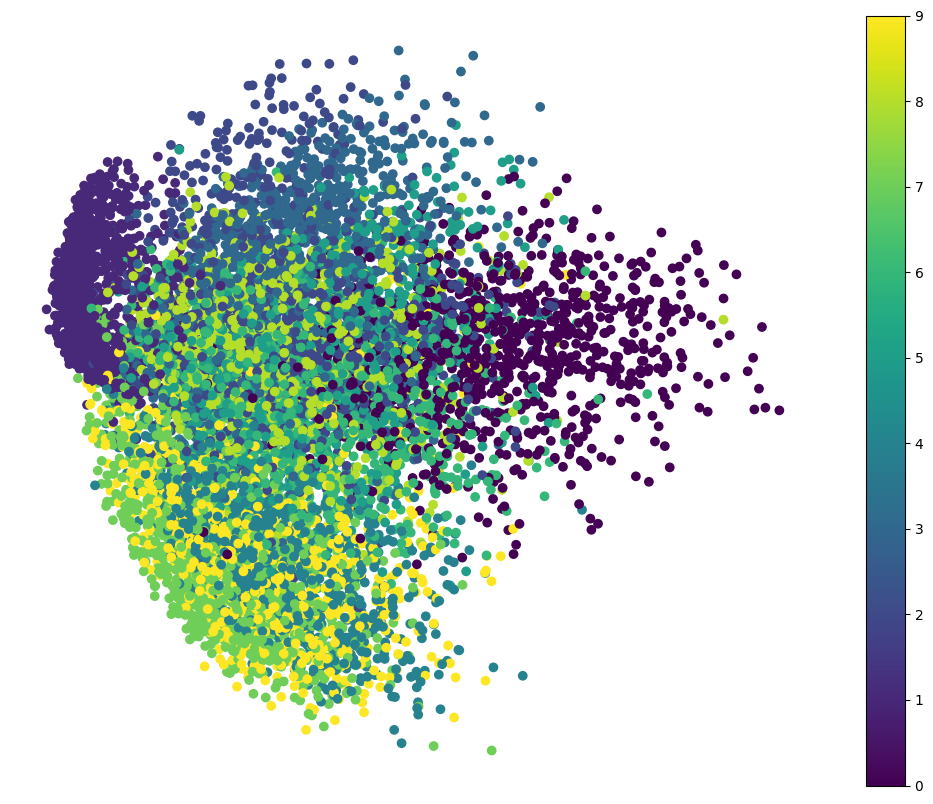

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y)
plt.axis('off')
plt.colorbar()
plt.show()

8) Le résultat d'affichage permet de donner une idée claire sur la distribution des instances de MNIST ?

##2- Utilisation de la méthode t-SNE

9) Créez un titre intitulé 2- Utilisation de la méthode t-SNE

10) Appliquez la méthode t-SNE sur les données (X) en choisissant un nombre de composant de 2

11) Affichez les données réduites en utilisant le code de la question 7

12) Existe-t-il des chevauchements entre quelques chiffres ? si oui lesquels ?

13) Comparez les résultats d'affichage de la méthode PCA et t-SNE.


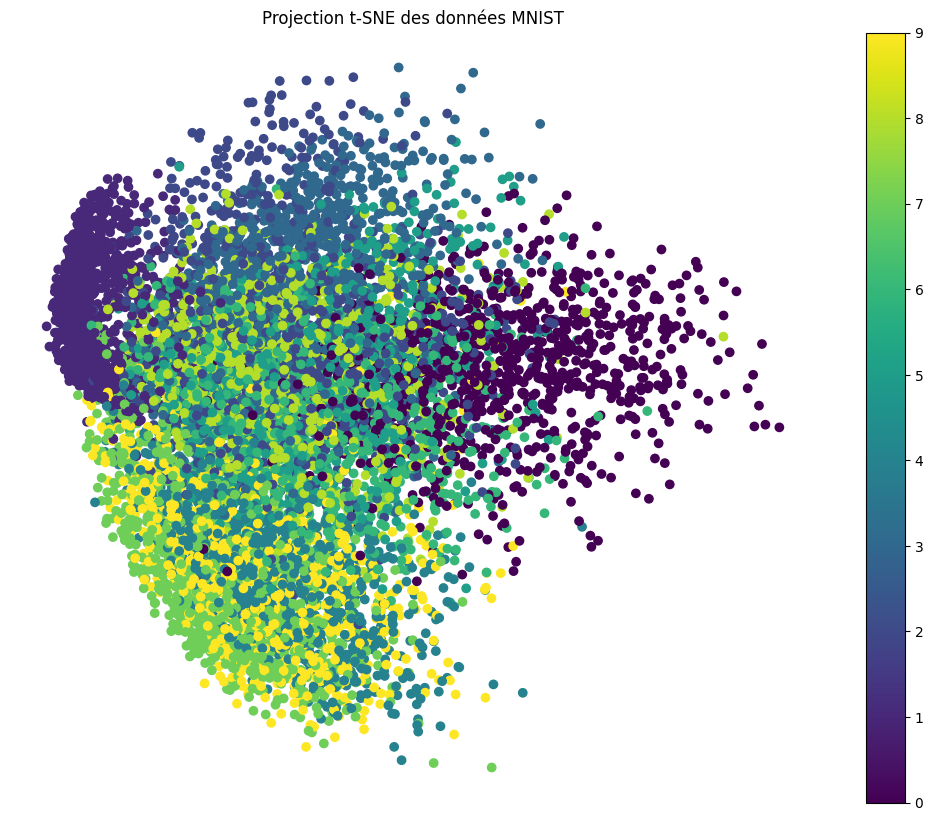

In [4]:
# Importation de la bibliothèque t-SNE
from sklearn.manifold import TSNE

# Application de la méthode t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne_reduced = tsne.fit_transform(X)

# Affichage des données réduites
plt.figure(figsize=(13,10))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y)
plt.axis('off')
plt.colorbar()
plt.title('Projection t-SNE des données MNIST')
plt.show()

# II- PCA sur les données MNIST



###14) Créez une section intitulée II- PCA sur les données MNIST



##1- Résultats de RandomForest SANS la réduction de la dimensionnalité des données



15) Créez une section intitulée 1- Résultats de RandomForest SANS la réduction de la dimensionnalité des données
16) Divisez la base de données MNIST en base d'apprentissage et base de test comme suit :

X_train = mnist['data'][:60000]

y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]

y_test = mnist['target'][60000:]



In [5]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]
X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

17) Appliquez la méthode de classification RandomForest sur les données d'apprentissage tout en calculant le temps d'exécution nécessaire pour l'apprentissage. Pour ce deuxième objectif, calculez :

a) avant l'apprentissage du modèle, le nombre de secondes passé depuis le 01/01/1970 en utilisant la fonction "time()" du module time

b) après l'apprentissage du modèle, le nombre de secondes passé depuis le 01/01/1970 en utilisant la fonction "time()" du module time

c) le temps d'exécution nécessaire pour l'apprentissage an appliquant la différence des résultats de la question 2.a et 2.b. Pensez à n'afficher que 2 chiffres après la virgule en utilisant la méthode "format()"  (ci-dessous un exemple d'utilisation) :

format(math.pi, '.2f')   # 3.14

d) Évaluez le modèle d'apprentissage sur la base de test en affichant le taux de classification. Pour ce faire :
i) prédisez les labels de la base de test avec la fonction "predict"

ii) utilisez la fonction accuracy_score du sous-module metrics du module sklearn tout en donnant en argument les labels réels de la base de test
et les labels prédits


In [6]:
# Importation des bibliothèques nécessaires
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time

# Application de RandomForest
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Mesure du temps d'apprentissage
start_time = time.time()
clf_rf.fit(X_train, y_train)
end_time = time.time()
training_time_rf = end_time - start_time

print(f"Temps d'apprentissage (RandomForest sans réduction): {training_time_rf:.2f} secondes")

# Prédiction et évaluation
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Taux de classification (RandomForest sans réduction): {accuracy_rf:.4f}")

Temps d'apprentissage (RandomForest sans réduction): 42.66 secondes
Taux de classification (RandomForest sans réduction): 0.9705


##2- Résultats de RandomForest AVEC la réduction de la dimensionnalité des données

18) Créez une section intitulée 2- Résultats de RandomForest AVEC la réduction de la dimensionnalité des données

19) Appliquez la méthode PCA sur la base d'apprentissage avec une variance ratio de 95%. Cela va permettre de définir le nombre minimum de dimensions requises pour préserver 95% de la variance de l'ensemble d'apprentissage.

20) Appliquez à nouveau la méthode de classification RandomForest sur les données d'apprentissage réduites (après l'application du PCA) tout en calculant le temps d'exécution nécessaire pour l'apprentissage (suivez les étapes de la question 16). Le temps d'apprentissage est plus rapide que celui du II-1 ? C'est le résultat attendu ?

21) Appliquez la méthode PCA sur la base de test avec un variance ratio de 95% (utilisez la fonction transform et non pas fit_trannsform sur l'objet instancié dans la question 19 pour avoir la même dimension des données d'apprentissage réduites de la question 19).

22) Évaluez le modèle d'apprentissage sur la base de test en affichant le taux de classification. Comparez le résultat avec celui de la II-1.

23) L'application du PCA sur les données MNIST était fructueuse pour le temps d'apprentissage et le taux de classification dans le cas de RandomForest ?


In [7]:
# Application de PCA sur la base d'apprentissage pour préserver 95% de la variance
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)

# Application de RandomForest sur les données réduites
clf_rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)

# Mesure du temps d'apprentissage
start_time = time.time()
clf_rf_pca.fit(X_train_pca, y_train)
end_time = time.time()
training_time_rf_pca = end_time - start_time

print(f"Temps d'apprentissage (RandomForest avec PCA): {training_time_rf_pca:.2f} secondes")

# Application de PCA sur la base de test
X_test_pca = pca.transform(X_test)

# Prédiction et évaluation
y_pred_rf_pca = clf_rf_pca.predict(X_test_pca)
accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
print(f"Taux de classification (RandomForest avec PCA): {accuracy_rf_pca:.4f}")


Temps d'apprentissage (RandomForest avec PCA): 111.16 secondes
Taux de classification (RandomForest avec PCA): 0.9488


##3- Résultats de Softmax SANS la réduction de la dimensionnalité des données

24) Créez une section intitulée 3- Résultats de Softmax SANS la réduction de la dimensionnalité des données

25) Appliquez la méthode de classification LogisticRegression sur les données d'apprentissage tout en calculant le temps d'exécution nécessaire pour l'apprentissage.

26) Évaluez le modèle d'apprentissage sur la base de test en affichant le taux de classification


In [8]:
# Importation de la bibliothèque LogisticRegression
from sklearn.linear_model import LogisticRegression

# Application de la régression logistique (Softmax)
clf_lr = LogisticRegression(max_iter=1000, random_state=42)

# Mesure du temps d'apprentissage
start_time = time.time()
clf_lr.fit(X_train, y_train)
end_time = time.time()
training_time_lr = end_time - start_time

print(f"Temps d'apprentissage (LogisticRegression sans réduction): {training_time_lr:.2f} secondes")

# Prédiction et évaluation
y_pred_lr = clf_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Taux de classification (LogisticRegression sans réduction): {accuracy_lr:.4f}")


Temps d'apprentissage (LogisticRegression sans réduction): 171.66 secondes
Taux de classification (LogisticRegression sans réduction): 0.9204


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##4- Résultats de Softmax AVEC la réduction de la dimensionnalité des données

27) Créez une section intitulée 4- Résultats de Softmax AVEC la réduction de la dimensionnalité des données

28) Appliquez à nouveau la méthode de classification LogisticRegression sur les données d'apprentissage réduites (après l'application du PCA) tout en calculant le temps d'exécution nécessaire pour l'apprentissage. Le temps d'apprentissage est plus rapide que celui du II-3 ?
29) Appliquez la méthode PCA sur la base de test avec un variance ratio de 95% (utilisez la fonction transform et non pas fit_trannsform)
30) Évaluez le modèle d'apprentissage sur la base de test en affichant le taux de classification. Comparez le résultat avec celui de la II-3.

31) L'application du PCA sur les données MNIST était fructueuse pour le temps d'apprentissage et le taux de classification dans le cas de Softmax ?

32) L'application du PCA sur les données contribue toujours à accélérer le temps de calcul du modèle d'apprentissage ?


In [9]:
# Application de PCA sur la base d'apprentissage pour préserver 95% de la variance
X_train_pca = pca.fit_transform(X_train)

# Application de la régression logistique (Softmax) sur les données réduites
clf_lr_pca = LogisticRegression(max_iter=1000, random_state=42)

# Mesure du temps d'apprentissage
start_time = time.time()
clf_lr_pca.fit(X_train_pca, y_train)
end_time = time.time()
training_time_lr_pca = end_time - start_time

print(f"Temps d'apprentissage (LogisticRegression avec PCA): {training_time_lr_pca:.2f} secondes")

# Application de PCA sur la base de test
X_test_pca = pca.transform(X_test)
#X_test_pca = pca.transform(X_train_pca)

# Prédiction et évaluation
y_pred_lr_pca = clf_lr_pca.predict(X_test_pca)
accuracy_lr_pca = accuracy_score(y_test, y_pred_lr_pca)
print(f"Taux de classification (LogisticRegression avec PCA): {accuracy_lr_pca:.4f}")


Temps d'apprentissage (LogisticRegression avec PCA): 48.46 secondes
Taux de classification (LogisticRegression avec PCA): 0.9234


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Conclusion

L'application du PCA réduit généralement le temps de calcul tout en maintenant une bonne précision. En comparant les résultats, vous pouvez observer si la réduction de la dimensionnalité améliore le temps de traitement et l'efficacité du modèle.
